In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [41]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [10]:
df=pd.read_csv('iris (7) (3) (1).csv')
df.head(10)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [11]:
df.columns.tolist()

['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class']

In [12]:
df=df.rename(columns={'class':'species'})

In [13]:
df.head(10)

,sepallength,sepalwidth,petallength,petalwidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [14]:
df.dtypes

sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
species         object
dtype: object

In [15]:
df['species']=df['species'].apply(lambda x: x[5:])

In [16]:
df.head(10)

,sepallength,sepalwidth,petallength,petalwidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [17]:
df.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
species        0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(3)

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

np.int64(0)

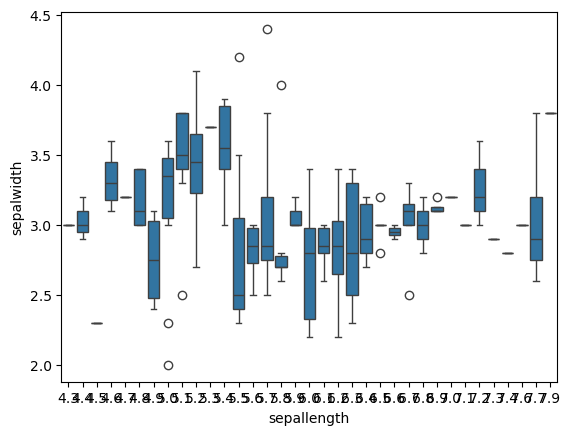

In [21]:
sns.boxplot(x='sepallength',y='sepalwidth',data=df)
plt.show()

<Axes: xlabel='species'>

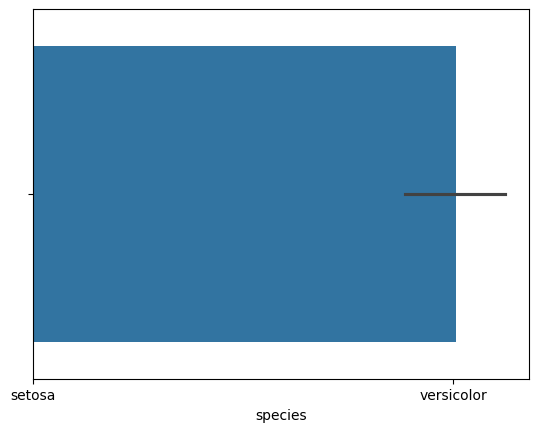

In [25]:
sns.barplot(x=df['species'])

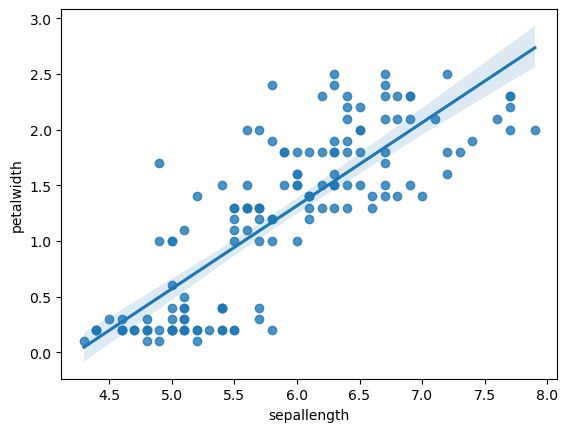

In [26]:
sns.regplot(x='sepallength',y='petalwidth',data=df)
plt.show()

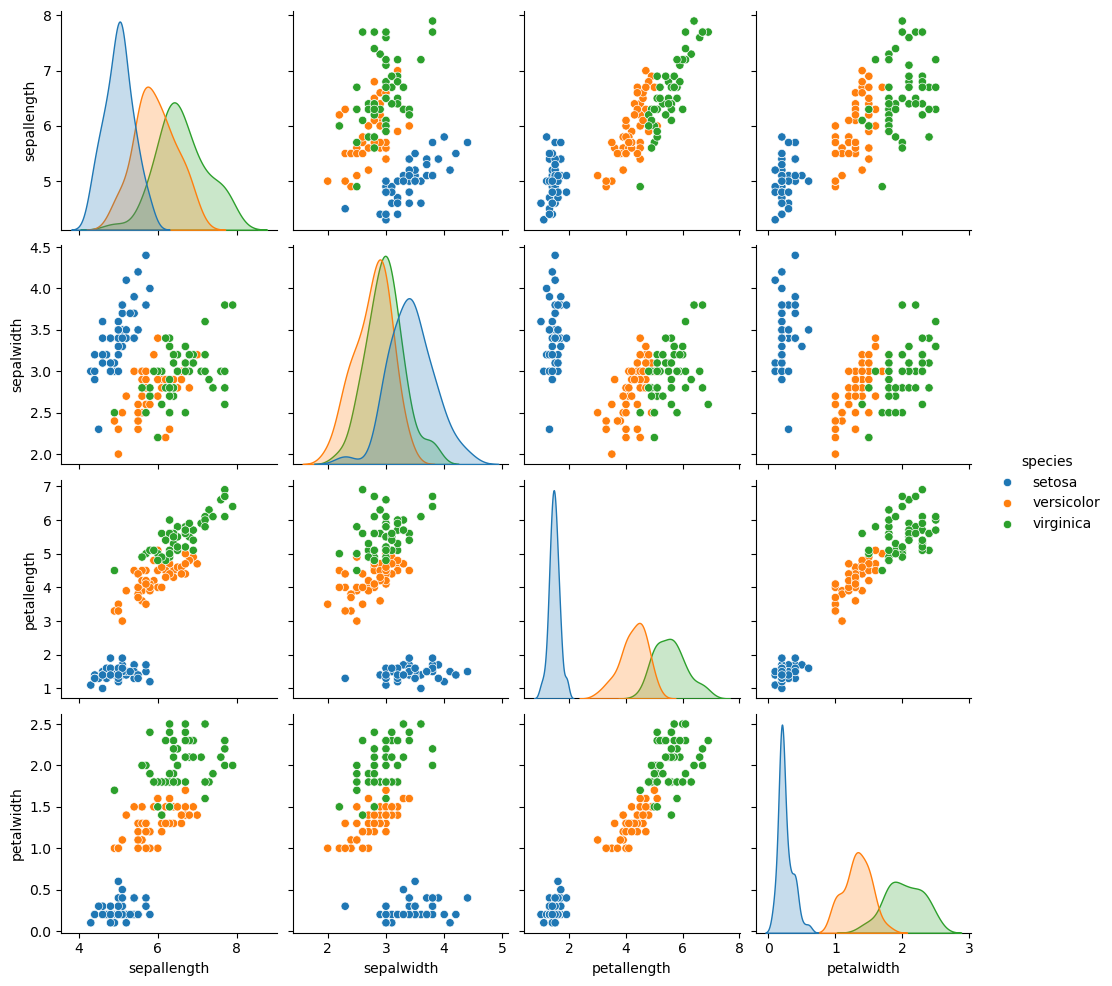

In [27]:
sns.pairplot(df,hue='species')

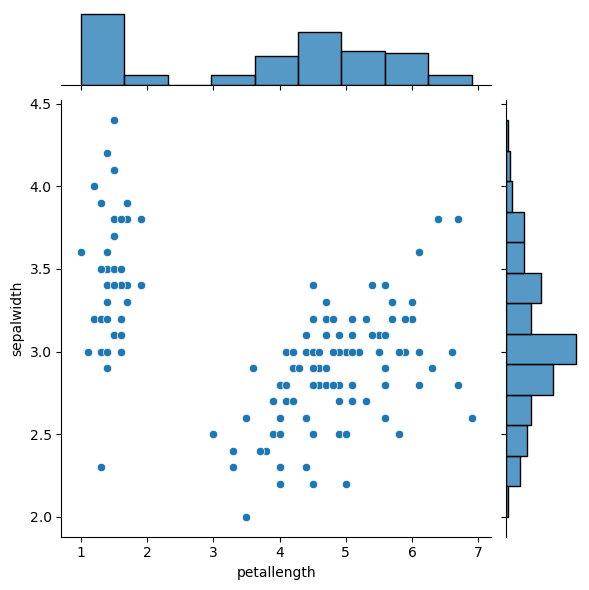

In [28]:
sns.jointplot(x='petallength',y='sepalwidth',data=df)

<Axes: xlabel='sepallength', ylabel='petalwidth'>

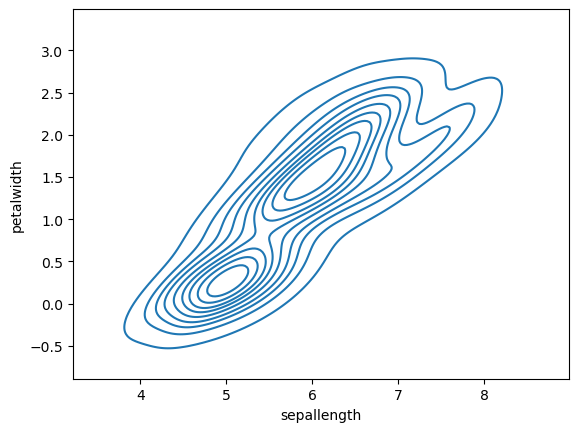

In [31]:
sns.kdeplot(x='sepallength',y='petalwidth',data=df)

In [33]:
x=df.drop(columns=['species'],axis=1)
y=df['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [35]:
tree=DecisionTreeClassifier(criterion='entropy',max_depth=5)
tree.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [36]:
yhat=tree.predict(x_test)

In [37]:
print(accuracy_score(y_test,yhat))
print(classification_report(y_test,yhat))
print(confusion_matrix(y_test,yhat))

0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.90      0.95        10
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


In [39]:
params={
    'criterion':['gini','entropy'],
    'max_depth':[2,3,4,5,None],
    'min_samples_split':[2,4,6],
    'min_samples_leaf':[1,2,3]
}
grid=GridSearchCV(DecisionTreeClassifier(random_state=42),params,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6]})

In [46]:
print(grid.best_params_)


{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [48]:
best_model=grid.best_estimator_
y_pred=best_model.predict(x_test)

In [49]:
accuracy_score(y_test,y_pred)
classification_report(y_test,y_pred)
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]])